# Heatmap

Conseguir el heatmaps com a imatges per utilitzar a la CNN

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.ndimage import gaussian_filter

In [2]:
df = pd.read_csv('S0_csv')

In [12]:
lim_inferior = df.quantile(q=0.035)
lim_superior = df.quantile(q=0.975)
print(lim_inferior)
print(lim_superior)

timestamp                 44.495969
gaze2d_x                   0.453520
gaze2d_y                   0.446715
eyeleft_pupildiameter      3.063118
eyeright_pupildiameter     3.071837
Name: 0.035, dtype: float64
timestamp                 1239.216682
gaze2d_x                     0.590713
gaze2d_y                     0.650877
eyeleft_pupildiameter        4.030552
eyeright_pupildiameter       4.098251
Name: 0.975, dtype: float64


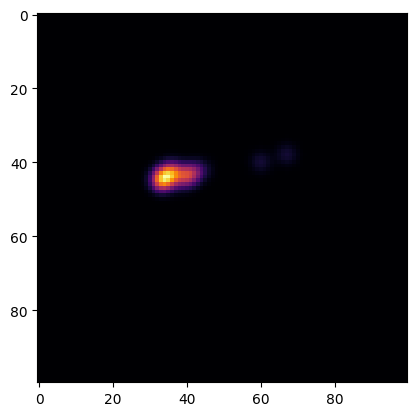

In [9]:
x = df['gaze2d_x'][300:360]  #Canviar a 10,...
y = df['gaze2d_y'][300:360]

# Per calcular els rangs
lim_inferior = df.quantile(q=0.025)
lim_superior = df.quantile(q=0.975)
rang = (lim_inferior.iloc[1], lim_superior.iloc[1]),(lim_inferior.iloc[2], lim_superior.iloc[2])

for i in range(300,10000):
    x = df['gaze2d_x'][i:i+25]
    y = df['gaze2d_y'][i:i+25]
    heatmap, x_edges, y_edges = np.histogram2d(x, y, bins=(100,100), range= rang)
    gaussia_heatmap = gaussian_filter(heatmap, 2)
    plt.imshow(gaussia_heatmap, cmap='inferno')
    plt.imsave('HM_images/hm_'+str(i)+'.png', gaussia_heatmap, cmap='inferno')

In [4]:
heatmap, x_edges, y_edges = np.histogram2d(x, y, bins=(100,100), range= rang)
sigma = (np.std(df['gaze2d_x'])*25, np.std(df['gaze2d_y'])*25)

gaussia_heatmap = gaussian_filter(heatmap, sigma)
sigma

(1.2407395469533977, 1.6687516201671693)

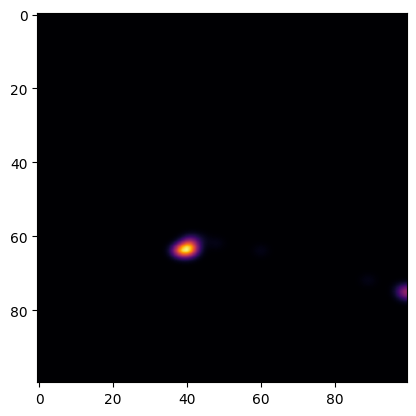

In [6]:
plt.imshow(gaussia_heatmap, cmap='inferno', interpolation='gaussian')


In [119]:
df

,timestamp,gaze2d_x,gaze2d_y,eyeleft_pupildiameter,eyeright_pupildiameter
0,0.044119,0.540835,0.487419,5.311900,5.358642
1,0.064209,0.541075,0.487463,5.312712,5.358128
2,0.084192,0.541212,0.487721,5.315170,5.355756
3,0.104281,0.541327,0.488020,5.317843,5.353019
4,0.124264,0.541634,0.488274,5.319236,5.349982
...,...,...,...,...,...
21926,440.901779,0.000000,0.000000,0.000000,0.000000
21927,440.921762,0.000000,0.000000,0.000000,0.000000
21928,440.941851,0.000000,0.000000,0.000000,0.000000
21929,440.961834,0.000000,0.000000,0.000000,0.000000


In [115]:
plt.imsave('HM_images/hm_'+str(i)+'.png', gaussia_heatmap, cmap='inferno', interpolation='gaussian')

TypeError: imsave() got an unexpected keyword argument 'interpolation'

(array([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]]),
 array([0.  , 0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1 ,
        0.11, 0.12, 0.13, 0.14, 0.15, 0.16, 0.17, 0.18, 0.19, 0.2 , 0.21,
        0.22, 0.23, 0.24, 0.25, 0.26, 0.27, 0.28, 0.29, 0.3 , 0.31, 0.32,
        0.33, 0.34, 0.35, 0.36, 0.37, 0.38, 0.39, 0.4 , 0.41, 0.42, 0.43,
        0.44, 0.45, 0.46, 0.47, 0.48, 0.49, 0.5 , 0.51, 0.52, 0.53, 0.54,
        0.55, 0.56, 0.57, 0.58, 0.59, 0.6 , 0.61, 0.62, 0.63, 0.64, 0.65,
        0.66, 0.67, 0.68, 0.69, 0.7 , 0.71, 0.72, 0.73, 0.74, 0.75, 0.76,
        0.77, 0.78, 0.79, 0.8 , 0.81, 0.82, 0.83, 0.84, 0.85, 0.86, 0.87,
        0.88, 0.89, 0.9 , 0.91, 0.92, 0.93, 0.94, 0.95, 0.96, 0.97, 0.98,
        0.99, 1.  ]),
 array([0.  , 0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0

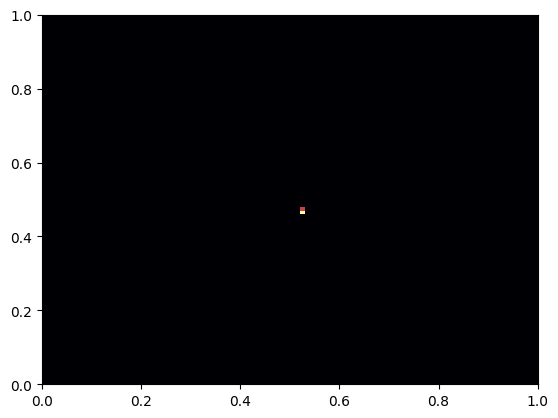

In [60]:
plt.hist2d(x,y, bins = (100,100), cmap='inferno', range= ((0,1),(0,1)))

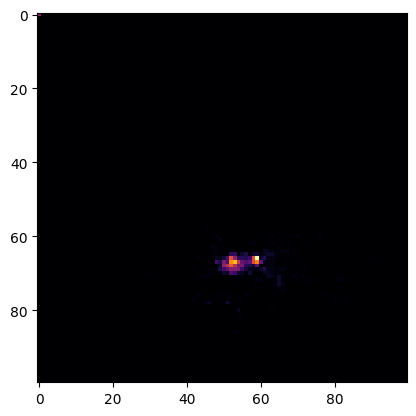

In [57]:
hist , x_edge, y_edge = np.histogram2d(df['gaze2d_x'],df['gaze2d_y'],bins=(100,100))

plt.imshow(hist, cmap='inferno')


In [54]:
plt.imsave('HM_images/hola.png', hist, cmap='inferno')